In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [40]:
import os

dataset = "C://Users/Admin/Documents/Chihuahua-or-Muffin/"

chihuahua_images = os.path.join('C://Users/Admin/Documents/Chihuahua-or-Muffin/Chihuahua')
muffin_images = os.path.join('C://Users/Admin/Documents/Chihuahua-or-Muffin/Muffin')

In [41]:
print("Number of Chihuahua images: ", len(os.listdir(chihuahua_images)))
print("Number of Muffin Images: ", len(os.listdir(muffin_images)))

chihuahua_files = os.listdir(chihuahua_images)
muffin_files = os.listdir(muffin_images)

Number of Chihuahua images:  8
Number of Muffin Images:  8


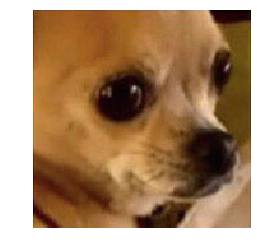

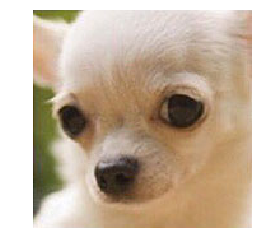

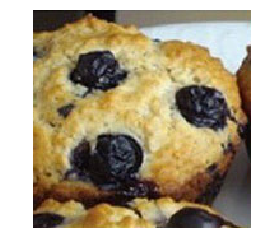

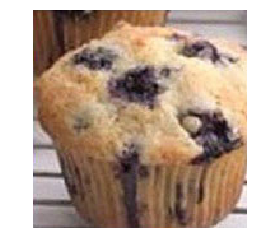

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_chihuahua = [os.path.join(chihuahua_images, fname) 
                for fname in chihuahua_files[pic_index-2:pic_index]]
next_muffin = [os.path.join(muffin_images, fname) 
                for fname in muffin_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_chihuahua+next_muffin):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [43]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(150,150),
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [44]:
model = tf.keras.Sequential([
    
    #1st Conv2D Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #2nd Conv2D Layer
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [45]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

history = model.fit_generator(
    train_generator,
    epochs=25,
    verbose=1
)

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 0.6751 - acc: 0.5625
Epoch 2/25
1/1 [==============================] - 2s 2s/step - loss: 2.0876 - acc: 0.5000
Epoch 3/25
1/1 [==============================] - 2s 2s/step - loss: 6.8680 - acc: 0.5000
Epoch 4/25
1/1 [==============================] - 2s 2s/step - loss: 2.7269 - acc: 0.5000
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 0.6475 - acc: 0.8750
Epoch 6/25
1/1 [==============================] - 2s 2s/step - loss: 0.6438 - acc: 0.6250
Epoch 7/25
1/1 [==============================] - 2s 2s/step - loss: 0.6473 - acc: 0.6875
Epoch 8/25
1/1 [==============================] - 2s 2s/step - loss: 0.7148 - acc: 0.5000
Epoch 9/25
1/1 [==============================] - 2s 2s/step - loss: 0.8219 - acc: 0.5000
Epoch 10/25
1/1 [==============================] - 2s 2s/step - loss: 0.9577 - acc: 0.5000
Epoch 11/25
1/1 [==============================] - 2s 2s/step - loss: 0.6931 - acc: 0.5625
Epoch 12

In [48]:
import numpy as np

predict = ['Chihuahua', 'Muffin']

img = image.load_img('C://Users/Admin/Documents/Chihuahua-or-Muffin/Muffin/muffin-3.jpeg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
for i in range(0,1):
    if classes[0][i] == 1:
        print(predict[i])

Chihuahua
